# Sentiment Analysis

A few tools to use here for sentiment analysis:

**TextBlob Module**: 
Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.

**Sentiment Labels**: 
Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.

* Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
* Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the covid publication.

Some hypothesis to test out:

1. What is the overall sentiment among those paper?
2. How does sentiment change over time?
3. How related the sentiment with reference number and co-authors number?
 

In [23]:
import pandas as pd
dr = pd.read_pickle('data/covid19_reference_count.pickle')
title = pd.read_pickle('data/covid19_title.pickle')
title30 = title[dr>=30]
title30_text = title30.astype('str')

In [29]:
# read in dates in Datetime format
pdate = pd.read_pickle('data/title30_pdate2.pkl')
pdate30 = pdate[dr>=30]

In [30]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

title30_senti = pd.DataFrame()
title30_senti['polarity'] = title30_text.apply(pol)
title30_senti['subjectivity'] = title30_text.apply(sub)

polarity
subjectivity


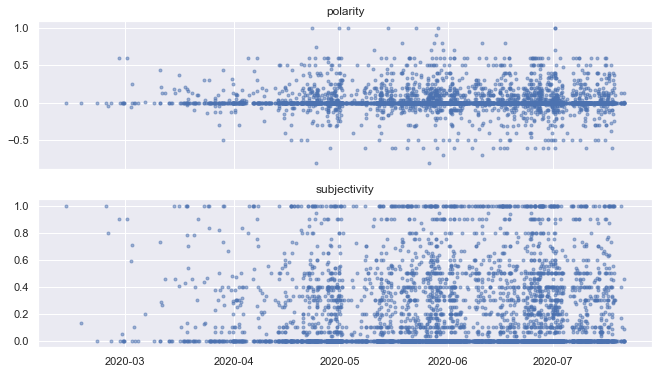

In [47]:
import matplotlib.pyplot as plt
# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

fig, axes = plt.subplots(2, 1, figsize=(11, 6), sharex=True)
for name, ax in zip(['polarity', 'subjectivity'], axes):
    ax.plot(pdate30,title30_senti[name],marker='.', alpha=0.5, linestyle='None')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
#    if ax != axes[-1]:
#        ax.set_xlabel('')

### Repeat the process above across all papers

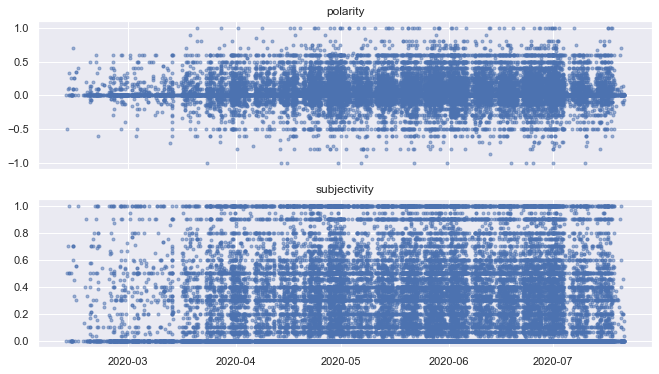

In [48]:
title_senti = pd.DataFrame()
title_text = title.astype('str')
title_senti['polarity'] = title_text.apply(pol)
title_senti['subjectivity'] = title_text.apply(sub)

fig, axes = plt.subplots(2, 1, figsize=(11, 6), sharex=True)
for name, ax in zip(['polarity', 'subjectivity'], axes):
    ax.plot(pdate,title_senti[name],marker='.', alpha=0.5, linestyle='None')
    ax.set_title(name)

Interesting observation here:

Along the time, paper is more positive talking about COVID-19. 
The option in papers is surprisingly stronger than I would expect. Academic paper should be subject to facts mainly. But it is not the case in this analysis.

It is worth looking into more detailed analysis. 

### Apply the same approach to the abstract which is being referenced more than 30 times

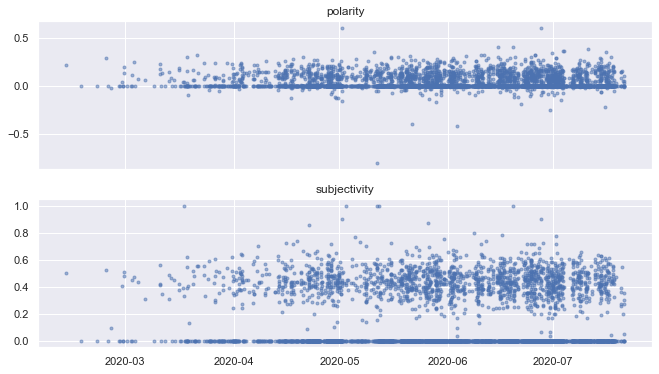

In [53]:
dr = pd.read_pickle('data/covid19_reference_count.pickle')
abstract = pd.read_pickle('data/covid19_abstract.pickle')
abstract30 = abstract[dr>=30]
abstract30_text = abstract30.astype('str')
abstract30_senti = pd.DataFrame()
abstract30_senti['polarity'] = abstract30_text.apply(pol)
abstract30_senti['subjectivity'] = abstract30_text.apply(sub)
fig, axes = plt.subplots(2, 1, figsize=(11, 6), sharex=True)
for name, ax in zip(['polarity', 'subjectivity'], axes):
    ax.plot(pdate30,abstract30_senti[name],marker='.', alpha=0.5, linestyle='None')
    ax.set_title(name)

Comments: why the subjectivity values change a lot in abstract? I need to double check the data.

If the data is all right, interesting observations:
1. the abstract shows much more positive tones in most of papers (reference count >=30)
2. facts oritented with some subjectivity (need to work out the percentage of subjective terms)

### Apply the same approach to all abstracts 

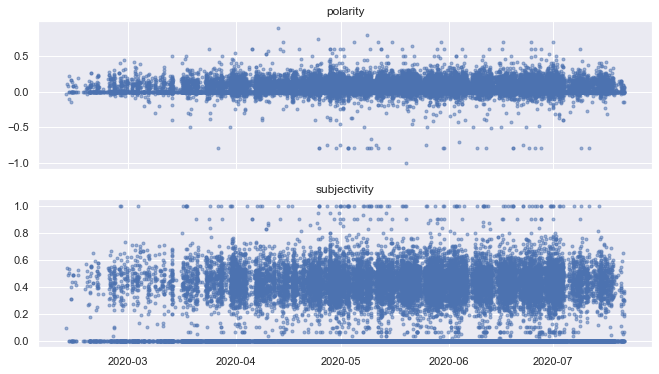

In [54]:
dr = pd.read_pickle('data/covid19_reference_count.pickle')
abstract = pd.read_pickle('data/covid19_abstract.pickle')
abstract_text = abstract.astype('str')
abstract_senti = pd.DataFrame()
abstract_senti['polarity'] = abstract_text.apply(pol)
abstract_senti['subjectivity'] = abstract_text.apply(sub)
fig, axes = plt.subplots(2, 1, figsize=(11, 6), sharex=True)
for name, ax in zip(['polarity', 'subjectivity'], axes):
    ax.plot(pdate,abstract_senti[name],marker='.', alpha=0.5, linestyle='None')
    ax.set_title(name)

Similar pattern as we seen in paper with 30 and above reference counts.